In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# FIX ME: Root dir as argument
root_dir = "../../data/picklerCheckpoints/"
is_compressed = True;

In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\ProgramData\Anaconda3\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


In [3]:
import nbimporter
import Preprocessing.SpatialMapping as sm
import Preprocessing.Discretization as dis
import time
import math
import seaborn as sns

Importing Jupyter notebook from C:\Users\KaavyaaStalinThara\Downloads\New folder\ML2020-Uber-Data-Analysis-main\Preprocessing\SpatialMapping.ipynb
Importing Jupyter notebook from C:\Users\KaavyaaStalinThara\Downloads\New folder\ML2020-Uber-Data-Analysis-main\commons\utility\pickle_util.ipynb
Importing Jupyter notebook from C:\Users\KaavyaaStalinThara\Downloads\New folder\ML2020-Uber-Data-Analysis-main\Preprocessing\DataEnrichment.ipynb
Importing Jupyter notebook from C:\Users\KaavyaaStalinThara\Downloads\New folder\ML2020-Uber-Data-Analysis-main\Preprocessing\Discretization.ipynb


In [4]:
data = sm.run(['aug', 'jun'])

Data for the month :aug Found.....
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading file ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-aug14.p
Decompressing ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-aug14.p.pbz2..............Done
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Data for the month :jun Found.....
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading file ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-jun14.p
Decompressing ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-jun14.p.pbz2..............Done
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [5]:
df = data
data

,Date/Time,Lat,Lon,Base,datetime,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday,geometry,index_right,zone,LocationID,borough,borough_categ
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512,08-01-2014:00,broken clouds,57.0,1019.0,297.51,0.0,2.0,weekday,POINT (-73.99060 40.73660),112.0,Greenwich Village North,113.0,Manhattan,3.0
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512,08-01-2014:00,broken clouds,57.0,1019.0,297.51,0.0,2.0,weekday,POINT (-73.99060 40.73660),233.0,Union Sq,234.0,Manhattan,3.0
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512,08-01-2014:00,broken clouds,57.0,1019.0,297.51,0.0,2.0,weekday,POINT (-73.99180 40.72600),78.0,East Village,79.0,Manhattan,3.0
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512,08-01-2014:00,broken clouds,57.0,1019.0,297.51,0.0,2.0,weekday,POINT (-73.99180 40.72600),113.0,Greenwich Village South,114.0,Manhattan,3.0
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512,08-01-2014:00,broken clouds,57.0,1019.0,297.51,0.0,2.0,weekday,POINT (-73.98560 40.73870),106.0,Gramercy,107.0,Manhattan,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663841,6/30/2014 23:13:00,40.7640,-73.9887,B02764,06-30-2014:23,sky is clear,59.0,1016.0,302.18,199.0,1.0,weekday,POINT (-73.98870 40.76400),49.0,Clinton West,50.0,Manhattan,3.0
663841,6/30/2014 23:13:00,40.7640,-73.9887,B02764,06-30-2014:23,sky is clear,59.0,1016.0,302.18,199.0,1.0,weekday,POINT (-73.98870 40.76400),229.0,Times Sq/Theatre District,230.0,Manhattan,3.0
663842,6/30/2014 23:15:00,40.7262,-73.9944,B02764,06-30-2014:23,sky is clear,59.0,1016.0,302.18,199.0,1.0,weekday,POINT (-73.99440 40.72620),113.0,Greenwich Village South,114.0,Manhattan,3.0
663843,6/30/2014 23:35:00,40.7404,-73.9848,B02764,06-30-2014:23,sky is clear,59.0,1016.0,302.18,199.0,1.0,weekday,POINT (-73.98480 40.74040),106.0,Gramercy,107.0,Manhattan,3.0


In [6]:
df = data.copy()
columns = ['datetime', 'zone', 'weatherCondition', 'humidity', 'pressure', 'temperature', 'windDirection', 'windSpeed', 'holiday']

In [7]:
df2 = df[columns]
df2g = dis.encode(df2, ['zone', 'weatherCondition', 'holiday'])
df2g = df2.groupby(columns).size().reset_index(name='counts')
df2g['datetime'] = pd.to_datetime(df2g['datetime'], format='%m-%d-%Y:%H').apply(lambda x: time.mktime(x.timetuple()))

C:\Users\KaavyaaStalinThara\Downloads\New folder\ML2020-Uber-Data-Analysis-main\Preprocessing\Discretization.ipynb:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "metadata": {},


Result Saved in ../data/encodedMappings/zone.p
Result Saved in ../data/encodedMappings/weatherCondition.p
Result Saved in ../data/encodedMappings/holiday.p


In [8]:
from sklearn.preprocessing import MinMaxScaler
counts = df2g['counts'].copy()
datetime = df2g['datetime'].copy()

In [9]:
df2g

,datetime,zone,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday,counts
0,1.401574e+09,1,0,63.0,1024.0,291.18,120.0,4.0,1,22
1,1.401574e+09,4,0,63.0,1024.0,291.18,120.0,4.0,1,3
2,1.401574e+09,6,0,63.0,1024.0,291.18,120.0,4.0,1,1
3,1.401574e+09,7,0,63.0,1024.0,291.18,120.0,4.0,1,1
4,1.401574e+09,10,0,63.0,1024.0,291.18,120.0,4.0,1,13
...,...,...,...,...,...,...,...,...,...,...
206189,1.409519e+09,251,10,88.0,1015.0,298.53,0.0,2.0,1,3
206190,1.409519e+09,254,10,88.0,1015.0,298.53,0.0,2.0,1,5
206191,1.409519e+09,255,10,88.0,1015.0,298.53,0.0,2.0,1,7
206192,1.409519e+09,256,10,88.0,1015.0,298.53,0.0,2.0,1,6


In [10]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df2g) 
df2g.loc[:,:] = scaled_values
df2g['counts'] = counts
df2g['datetime'] = datetime

In [11]:
bins = [0, 10, 50, np.inf]
names = ['low', 'med', 'high']

df2g['label'] = pd.cut(df2g['counts'], bins, labels=names)

Result Saved in ../data/encodedMappings/label.p


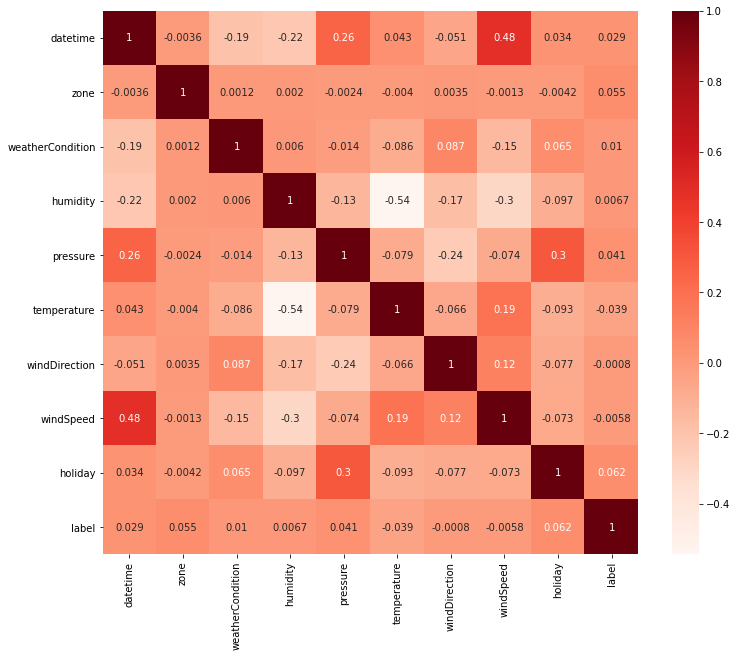

In [12]:
df2g = dis.encode(df2g, ['label'])
plt.figure(figsize=(12,10))
corrCols = columns.copy()
corrCols.append('label')
cor = df2g[corrCols].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
#Correlation with output variable
cor_target = abs(cor["label"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

label    1.0
Name: label, dtype: float64

In [14]:
class0, class1, class2 = df2g['label'].value_counts()
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=101)
x_ros, y_ros = ros.fit_resample(df2g[columns], df2g['label'])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x_ros, y_ros, test_size=0.33, random_state=100)

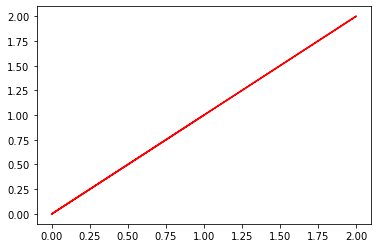

In [16]:

#regression tree model
from sklearn.tree import DecisionTreeRegressor
regressionmodel = DecisionTreeRegressor() 


#Fit the model
regressionmodel.fit(x_ros, y_ros)


#Predict 
predicted = regressionmodel.predict(X_test)
predicted


plt.plot(y_test,regressionmodel.predict(X_test), color = 'red')

In [17]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predicted))
print(metrics.mean_squared_error(y_test, predicted))
print(metrics.r2_score(y_test, predicted))


0.0
0.0
1.0


In [18]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,predicted))

Accuracy Score: 1.0


In [19]:
model = DecisionTreeRegressor()
trained = model.fit(X_train, y_train)

In [20]:
x_predict = trained.predict(X_test)
x_predict
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,x_predict))


Accuracy Score: 0.699249795736463


In [21]:
# Third check of regresssion tree by using without random and depth size.
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrix

Accuracy Score: 0.7438163856495581


array([[3542,   88,  828],
       [  99, 3666,  724],
       [ 946,  764, 2806]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report

In [23]:
Outcome = classification_report(y_test, x_predict)
print("Regression Tree",Outcome)

Regression Tree               precision    recall  f1-score   support

           0       0.75      0.78      0.77      4458
           1       0.75      0.73      0.74      4489
           2       0.60      0.59      0.59      4516

    accuracy                           0.70     13463
   macro avg       0.70      0.70      0.70     13463
weighted avg       0.70      0.70      0.70     13463

